In [313]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [314]:
df = pd.read_csv('salaries')
df

,company,job,degree,salary_more_than_100k
0,google,sale,b,0
1,google,sale,m,0
2,google,manager,b,1
3,google,manager,m,1
4,google,cp,b,0
5,google,cp,m,1
6,abcpharma,sale,m,0
7,abcpharma,cp,b,0
8,abcpharma,manager,b,0
9,abcpharma,manager,m,1


In [315]:
inputs = df.drop('salary_more_than_100k',axis='columns')
target = df['salary_more_than_100k']

In [316]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_than_100k, dtype: int64

In [317]:
from sklearn.preprocessing import LabelEncoder

In [318]:
le_company = LabelEncoder()
le_jobs = LabelEncoder()
le_degree = LabelEncoder()

In [319]:
inputs["company_n"] = le_company.fit_transform(inputs["company"])
inputs["job_n"] = le_company.fit_transform(inputs["job"])
inputs["degree_n"] = le_company.fit_transform(inputs["degree"])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sale,b,2,2,0
1,google,sale,m,2,2,1
2,google,manager,b,2,1,0
3,google,manager,m,2,1,1
4,google,cp,b,2,0,0


In [320]:
inputs = inputs.drop(['company','job','degree'],axis = 'columns')
inputs

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,1,0
3,2,1,1
4,2,0,0
5,2,0,1
6,0,2,1
7,0,0,0
8,0,1,0
9,0,1,1


In [321]:
from sklearn import tree

In [322]:
model = tree.DecisionTreeClassifier()

In [323]:
model.fit(inputs.values,target)

DecisionTreeClassifier()

In [324]:
model.score(inputs.values,target)

1.0

In [325]:
model.predict([[2,0,1]])

array([1], dtype=int64)

In [326]:
#Exercise

In [327]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [328]:
import seaborn as sns

In [329]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [334]:
df.Age = df.Age.fillna(df.Age.mean())
df = df.fillna({
        'Cabin': 0,
        'Embarked': 'C23'
    })
df.Cabin.value_counts()

0              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [335]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

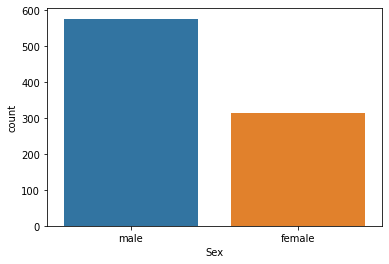

In [336]:
sns.countplot(x='Sex',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

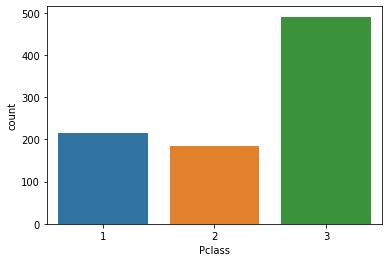

In [337]:
sns.countplot(x='Pclass',data=df)

In [338]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [339]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [340]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [341]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [342]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [343]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(inputs.values,target)

In [344]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [345]:
model.score(X_test,y_test)

0.7668161434977578